### Table of Contents

This Jupyter Notebook is complementary to the PDF report submitted. Please refer to the report for more explanations according to the requested information of the assignment. For the graded portions, you may jump straight to the [Actual Codes](#Actual-Codes) onwards.

[Load Packages](#Load-Packages)<br>
[Data Description](#Data-Description)<br>
[Data Processing](#Data-Processing)<br>
[Q1. Beta-binomial Naive Bayes](#Q1.-Beta-binomial-Naive-Bayes)
* [Exploratory](#Exploratory)<br>
* [Actual Codes](#Actual-Codes)<br>
* [Q1 (a)](#Q1-(a))
* [Q1 (b)](#Q1-(b))
* [Q1 (c)](#Q1-(c))

[Q2. Gaussian Naive Bayes](#Q2.-Gaussian-Naive-Bayes)
* [Q2 (a)](#Q2-(a))

[Q3. Logistic Regression](#Q3.-Logistic-Regression)
* [Q3 (a)](#Q3-(a))
* [Q3 (b)](#Q3-(b))
* [Q3 (c)](#Q3-(c))

[Q4. K-Nearest Neighbors](#Q4.-K-Nearest-Neighbors)<br>
* [Q4 (a)](#Q4-(a))
* [Q4 (b)](#Q4-(b))
* [Q4 (c)](#Q4-(c))

[Q5. Survey](#Q5.-Survey)<br>

In [1]:
# load packages
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Description
The data is an email spam dataset, consisting of 4601 email messages with 57 features. Feature
descriptions are found [in this link](https://web.stanford.edu/~hastie/ElemStatLearn/datasets/spam.info.txt). We have divided the data into a training set (3065 emails)
and test set (1536 emails) with accompanying labels (1 = spam , 0 = not spam).

In [2]:
# load data
data = loadmat('spamData.mat')
# preview data
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Sun Aug  9 09:46:15 2020', '__version__': '1.0', '__globals__': [], 'Xtrain': array([[5.100e-01, 4.300e-01, 2.900e-01, ..., 6.518e+00, 6.110e+02,
        2.340e+03],
       [0.000e+00, 0.000e+00, 1.440e+00, ..., 2.380e+00, 8.000e+00,
        5.000e+01],
       [1.600e-01, 3.200e-01, 6.500e-01, ..., 6.586e+00, 1.320e+02,
        9.550e+02],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.759e+00, 2.100e+01,
        4.030e+02],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.333e+00, 1.000e+01,
        4.900e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.433e+00, 5.000e+00,
        8.600e+01]]), 'Xtest': array([[  0.   ,   0.   ,   0.   , ...,   1.536,   8.   ,  63.   ],
       [  0.   ,   0.   ,   0.   , ...,   1.25 ,   3.   ,  15.   ],
       [  0.   ,   0.   ,   0.41 , ...,   1.522,  11.   ,  67.   ],
       ...,
       [  0.   ,   0.   ,   0.   , ...,   2.044,  22.   ,  92.   ],
       [  0.   ,   

In [3]:
# convert to pandas dataframes for visualising and simple processing
X_train = pd.DataFrame(data['Xtrain'])
X_test = pd.DataFrame(data['Xtest'])
y_train = pd.DataFrame(data['ytrain'])
y_test = pd.DataFrame(data['ytest'])

### Data Processing
One can try different preprocessing of the features. Consider the following separately:

##### (a) log-transform: 
Transform each feature using log(xij + 0.1) (assume natural log)

In [4]:
# transform
log_X_train = X_train.applymap(lambda x: np.log(x+0.1))
log_X_test = X_test.applymap(lambda x: np.log(x+0.1))

In [5]:
# preview & compare
print(X_train.head())
print(log_X_train.head())

     0     1     2    3     4     5     6     7     8     9   ...   47     48  \
0  0.51  0.43  0.29  0.0  0.14  0.03  0.00  0.18  0.54  0.62  ...  0.0  0.012   
1  0.00  0.00  1.44  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.0  0.000   
2  0.16  0.32  0.65  0.0  0.32  0.00  0.16  0.00  0.00  0.49  ...  0.0  0.000   
3  0.00  0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.0  0.000   
4  0.00  0.22  0.33  0.0  0.22  0.11  0.00  0.00  0.00  0.00  ...  0.0  0.019   

      49   50     51     52     53     54     55      56  
0  0.078  0.0  0.478  0.509  0.127  6.518  611.0  2340.0  
1  0.247  0.0  0.000  0.000  0.000  2.380    8.0    50.0  
2  0.000  0.0  0.773  0.080  0.080  6.586  132.0   955.0  
3  0.000  0.0  0.000  0.000  0.000  2.333    5.0     7.0  
4  0.253  0.0  0.000  0.000  0.000  2.068   11.0   395.0  

[5 rows x 57 columns]
         0         1         2         3         4         5         6   \
0 -0.494296 -0.634878 -0.941609 -2.302585 -1.427116 -2.040221

##### (b) binarization: 
Binarize features: I(xij > 0). In other words, if a feature is greater than 0, it’s simply set to 1. If it’s less than or equal to 0, it’s set to 0.

In [6]:
# transform
bnrz_X_train = X_train.applymap(lambda x: 1 if x>0 else 0)
bnrz_X_test = X_test.applymap(lambda x: 1 if x>0 else 0)

In [7]:
# preview & compare
print(X_train.head())
print(bnrz_X_train.head())

     0     1     2    3     4     5     6     7     8     9   ...   47     48  \
0  0.51  0.43  0.29  0.0  0.14  0.03  0.00  0.18  0.54  0.62  ...  0.0  0.012   
1  0.00  0.00  1.44  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.0  0.000   
2  0.16  0.32  0.65  0.0  0.32  0.00  0.16  0.00  0.00  0.49  ...  0.0  0.000   
3  0.00  0.00  0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.0  0.000   
4  0.00  0.22  0.33  0.0  0.22  0.11  0.00  0.00  0.00  0.00  ...  0.0  0.019   

      49   50     51     52     53     54     55      56  
0  0.078  0.0  0.478  0.509  0.127  6.518  611.0  2340.0  
1  0.247  0.0  0.000  0.000  0.000  2.380    8.0    50.0  
2  0.000  0.0  0.773  0.080  0.080  6.586  132.0   955.0  
3  0.000  0.0  0.000  0.000  0.000  2.333    5.0     7.0  
4  0.253  0.0  0.000  0.000  0.000  2.068   11.0   395.0  

[5 rows x 57 columns]
   0   1   2   3   4   5   6   7   8   9   ...  47  48  49  50  51  52  53  \
0   1   1   1   0   1   1   0   1   1   1  ...   0   1   1

### Q1. Beta-binomial Naive Bayes
Fit a Beta-Binomial naive Bayes classifier on the binarized data from the Data Processing section.<br>
Do not need to assume prior on class label (Use Maximum Likelihood). 
Assume a beta prior on the feature distribution B(a,a). Please refer to the PDF report for more information.
The first portion contains workings to explain the class and functions combined later. You may jump to the [Actual Codes](#Actual-Codes) portion if you wish.

#### Exploratory

In [8]:
# testing out function to split values by class & binary feature
# try for first column
col_idx = 0
print('viewing col_',col_idx,'by y:')
print('spam & x=1:', bnrz_X_train.loc[(y_train[0]==1) & (bnrz_X_train[col_idx]==1),col_idx].count())
print('spam & x=0:', bnrz_X_train.loc[(y_train[0]==1) & (bnrz_X_train[col_idx]==0),col_idx].count())
print('not spam & x=1:', bnrz_X_train.loc[(y_train[0]==0) & (bnrz_X_train[col_idx]==1),col_idx].count())
print('not spam & x=0:', bnrz_X_train.loc[(y_train[0]==0) & (bnrz_X_train[col_idx]==0),col_idx].count())
# check values tally to total
assert \
    bnrz_X_train.loc[(y_train[0]==1) & (bnrz_X_train[col_idx]==1),col_idx].count() \
    + bnrz_X_train.loc[(y_train[0]==1) & (bnrz_X_train[col_idx]==0),col_idx].count() \
    + bnrz_X_train.loc[(y_train[0]==0) & (bnrz_X_train[col_idx]==1),col_idx].count() \
    + bnrz_X_train.loc[(y_train[0]==0) & (bnrz_X_train[col_idx]==0),col_idx].count() \
    == len(bnrz_X_train)

viewing col_ 0 by y:
spam & x=1: 417
spam & x=0: 773
not spam & x=1: 268
not spam & x=0: 1607


In [9]:
# create beta function
def calculate_beta_pdf(a,b,pos,neg):
    """
    Calculates the pdf of Beta(a,b) distribution
    a : alpha parameter
    b : beta parameter
    pos : number of positive instances
    neg: number of negative instances
    """
    return (pos+a)/(pos+neg+a+b)

# try function on first column x SPAM
set_a = 100
print(
    calculate_beta_pdf(
        a=set_a,
        b=set_a, 
        pos=bnrz_X_train.loc[(y_train[0]==1) & (bnrz_X_train[col_idx]==1),col_idx].count(),
        neg=bnrz_X_train.loc[(y_train[0]==1) & (bnrz_X_train[col_idx]==0),col_idx].count()
    )
)

0.37194244604316545


In [10]:
def calculate_beta_pdf_per_feature(x_df, y_df, col_idx, y_class):
    x_pos = calculate_beta_pdf(
        a=set_a,
        b=set_a, 
        pos=x_df.loc[(y_df[0]==y_class) & (x_df[col_idx]==1),col_idx].count(),
        neg=x_df.loc[(y_df[0]==y_class) & (x_df[col_idx]==0),col_idx].count()
    )
    x_neg = 1-x_pos
    return x_pos, x_neg

# try function on first column x SPAM
print(
    calculate_beta_pdf_per_feature(
        x_df=bnrz_X_train, 
        y_df=y_train,
        col_idx=0,
        y_class=1
    )
)

(0.37194244604316545, 0.6280575539568345)


In [11]:
def create_cls_data_from_train(x_train, y_train, y_class):
    cls_data = pd.DataFrame()

    for col_idx in range(0, x_train.shape[1]):
        cls_data[col_idx] = list(calculate_beta_pdf_per_feature(
            x_df=x_train, y_df=y_train, col_idx=col_idx, y_class=y_class
        ))

    cls_data.index = [1,0]

    return cls_data

# preview & check
create_cls_data_from_train(bnrz_X_train, y_train, 1)

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
1,0.371942,0.360432,0.595683,0.08777,0.610072,0.388489,0.438129,0.353957,0.328777,0.457554,...,0.079856,0.197122,0.627338,0.135252,0.78777,0.593525,0.326619,0.928058,0.928058,0.928058
0,0.628058,0.639568,0.404317,0.91223,0.389928,0.611511,0.561871,0.646043,0.671223,0.542446,...,0.920144,0.802878,0.372662,0.864748,0.21223,0.406475,0.673381,0.071942,0.071942,0.071942


In [12]:
pos_cls_data = create_cls_data_from_train(bnrz_X_train, y_train, 1)
pos_class_mle = y_train.sum()/len(y_train)
pos_prob = []

neg_cls_data = create_cls_data_from_train(bnrz_X_train, y_train, 0)
neg_class_mle = 1-pos_class_mle
neg_prob = []

pred = []

# loop through each row
for row_idx in range(0, bnrz_X_test.shape[0]):
    
    row = bnrz_X_test.loc[row_idx,:]
    pos_p = pos_class_mle[0]
    neg_p = neg_class_mle[0]
    
    # loop through each feature
    for col_idx in range(0, bnrz_X_test.shape[1]):
        x_val = row[col_idx]
        # prob y is spam
        pos_p *= pos_cls_data.loc[x_val, col_idx]
        # prob y is not spam
        neg_p *= neg_cls_data.loc[x_val, col_idx]
        
#     print('pos_p', pos_p)
#     print('neg_p', neg_p)
    
    # append prediction
    if pos_p > neg_p:
        pred.append(1)
    else:
        pred.append(0)
    
    # optional storing of probabilites
    pos_prob.append(pos_p)
    neg_prob.append(neg_p)

def calculate_error(pred, actual):
    return (sum([1 if int(p)!=int(a) else 0 for p,a in zip(pred,actual)])/len(pred))*100

print(pred[1:10])
print(calculate_error(pred, y_test[0]))

[0, 0, 0, 0, 0, 1, 0, 1, 1]
14.583333333333334


#### Actual Codes

In [13]:
class BetaBinomialClassifier():

    def __init__(self, a, b, x_1, y_1, x_2, y_2):
        """        
        a : int 
            alpha parameter
        b : int 
            beta parameter
        x_1: pandas DataFrame
            train features
        y_1: pandas DataFrame
            train target values
        x_2: pandas DataFrame
            test features
        y_2: pandas DataFrame
            test target values
        """
        self.a = a
        self.b = b
        self.bnrz_X_train = x_1
        self.y_train = y_1
        self.bnrz_X_test = x_2
        self.y_test = y_2
        
    # functions
    def calculate_beta_pdf(self, pos,neg):
        """
        Calculates the pdf of Beta(a,b) distribution
        pos : number of positive instances
        neg: number of negative instances
        """
        return (pos+self.a)/(pos+neg+self.a+self.b)

    def calculate_error(self, pred, actual):
        """
        Calculate percentage of wrong classification
        """
        return (sum([1 if int(p)!=int(a) else 0 for p,a in zip(pred,actual)])/len(pred))*100
    
    # steps
    def calculate_beta_pdf_per_feature(self, x_df, y_df, col_idx, y_class):
        """
        Calculate one feature value per y_class
        """
        x_pos = self.calculate_beta_pdf(
            pos=x_df.loc[(y_df[0]==y_class) & (x_df[col_idx]==1),col_idx].count(),
            neg=x_df.loc[(y_df[0]==y_class) & (x_df[col_idx]==0),col_idx].count()
        )
        x_neg = 1-x_pos
        return x_pos, x_neg
    
    def create_cls_data_from_train(self, x_train, y_train, y_class):
        """
        Calculate all feature values based on train data per y_class
        and store into dataframe
        """
        cls_data = pd.DataFrame()

        for col_idx in range(0, x_train.shape[1]):
            cls_data[col_idx] = list(self.calculate_beta_pdf_per_feature(
                x_df=x_train, y_df=y_train, col_idx=col_idx, y_class=y_class
            ))

        cls_data.index = [1,0]

        return cls_data
    
    def predict(self, x_to_pred, pos_cls_data, neg_cls_data, pos_class_mle, neg_class_mle):
        """
        Predict on new data based on calculate feature information by class
        """

        pred = []

        # loop through each row
        for row_idx in range(0, x_to_pred.shape[0]):

            row = x_to_pred.loc[row_idx,:]
            pos_p = pos_class_mle[0]
            neg_p = neg_class_mle[0]

            # loop through each feature
            for col_idx in range(0, x_to_pred.shape[1]):
                x_val = row[col_idx]
                pos_p *= pos_cls_data.loc[x_val, col_idx]
                neg_p *= neg_cls_data.loc[x_val, col_idx]

            # append prediction
            if pos_p > neg_p:
                pred.append(1)
            else:
                pred.append(0)
            
        return pred
        
    def run(self):
        """
        Run pipeline
        """
        # class mle
        pos_class_mle = self.y_train.sum()/len(self.y_train)
        neg_class_mle = 1-pos_class_mle
        # feature calculations
        pos_cls_data = self.create_cls_data_from_train(self.bnrz_X_train, self.y_train, 1)
        neg_cls_data = self.create_cls_data_from_train(self.bnrz_X_train, self.y_train, 0)
        # get predictions
        train_pred = self.predict(self.bnrz_X_train, pos_cls_data, neg_cls_data, pos_class_mle, neg_class_mle)
        test_pred = self.predict(self.bnrz_X_test, pos_cls_data, neg_cls_data, pos_class_mle, neg_class_mle)
        # score and return results
        return self.calculate_error(train_pred, self.y_train[0]), \
               self.calculate_error(test_pred, self.y_test[0])

In [14]:
# trial on one round
set_a = 100
bbc = BetaBinomialClassifier(set_a, set_a, bnrz_X_train, y_train, bnrz_X_test, y_test)
bbc.run()

(13.605220228384992, 14.583333333333334)

#### Q1 (a) 
##### Plot errors across alpha = {0, 0.5, 1, 1.5, 2, · · · , 100}

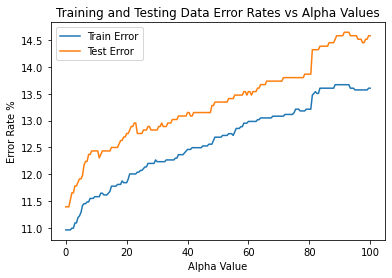

In [15]:
# initialise empty list for storage
list_of_alphas = list(np.arange(0, 100.5, 0.5))
train_error_list = []
test_error_list = []

# loop over alpha values
for set_a in list_of_alphas:
    bbc = BetaBinomialClassifier(set_a, set_a, bnrz_X_train, y_train, bnrz_X_test, y_test)
    train_error, test_error = bbc.run()
    train_error_list.append(train_error)
    test_error_list.append(test_error)
    
# plot chart
plt.plot(list_of_alphas, train_error_list, label='Train Error')
plt.plot(list_of_alphas, test_error_list, label='Test Error')
plt.ylabel('Error Rate %')
plt.xlabel('Alpha Value')
plt.title('Training and Testing Data Error Rates vs Alpha Values')
plt.legend()
plt.show()

In [16]:
print(train_error_list)
print(test_error_list)

[10.962479608482871, 10.962479608482871, 10.962479608482871, 10.962479608482871, 10.99510603588907, 10.99510603588907, 11.092985318107667, 11.092985318107667, 11.190864600326265, 11.223491027732463, 11.288743882544862, 11.419249592169658, 11.451876019575856, 11.451876019575856, 11.484502446982056, 11.484502446982056, 11.549755301794454, 11.549755301794454, 11.549755301794454, 11.582381729200652, 11.582381729200652, 11.582381729200652, 11.582381729200652, 11.64763458401305, 11.64763458401305, 11.615008156606851, 11.615008156606851, 11.615008156606851, 11.64763458401305, 11.68026101141925, 11.778140293637847, 11.778140293637847, 11.778140293637847, 11.778140293637847, 11.810766721044045, 11.810766721044045, 11.810766721044045, 11.876019575856443, 11.843393148450245, 11.843393148450245, 11.843393148450245, 11.908646003262643, 12.00652528548124, 12.00652528548124, 12.00652528548124, 12.00652528548124, 12.00652528548124, 12.039151712887438, 12.039151712887438, 12.071778140293638, 12.0717781

#### Q1 (b) 
##### What do you observe about the training and test errors as alpha changes?
Referring to the plot above, in general, the errors for both train and test increase as alpha increases. Specifically, both error rates increase steeply from alpha=1 to alpha=7 and face a sharp jump when alpha changes from 81 to 82.<br>
For every value of alpha, the test error rates are always higher than the train error rates. The gap between train and test error is narrower when alpha is smaller than around 8, and widest when alpha is around 93.

#### Q1 (c)
##### Training and testing error rates for alpha = 1, 10 and 100.

In [17]:
for val in [1,10,100]:
    idx = list_of_alphas.index(val)
    print('The training error for alpha='+str(list_of_alphas[idx])+' is: ', str(train_error_list[idx])+'%')
    print('The testing error for alpha='+str(list_of_alphas[idx])+' is: ', str(test_error_list[idx])+'%')

The training error for alpha=1.0 is:  10.962479608482871%
The testing error for alpha=1.0 is:  11.393229166666668%
The training error for alpha=10.0 is:  11.582381729200652%
The testing error for alpha=10.0 is:  12.434895833333332%
The training error for alpha=100.0 is:  13.605220228384992%
The testing error for alpha=100.0 is:  14.583333333333334%


### Q2. Gaussian Naive Bayes
Fit a Gaussian naive Bayes classifier on the log-transformed data from the Data Processing section. Class label prior is estimated using ML as per before. 
Use maximum likelihood to estimate the class conditional mean and variance of each feature and use ML estimates as a plug-in estimator for testing

In [18]:
class GaussianClassifier():

    def __init__(self, x_1, y_1, x_2, y_2):
        """        
        x_1: pandas DataFrame
            train features
        y_1: pandas DataFrame
            train target values
        x_2: pandas DataFrame
            test features
        y_2: pandas DataFrame
            test target values
        """
        self.log_X_train = x_1
        self.y_train = y_1
        self.log_X_test = x_2
        self.y_test = y_2
        
    # functions
    
    def calculate_mean(self, vector):
        """
        ML estimation of mean
        """
        return sum(vector)/len(vector)
    
    def calculate_variance(self, vector, mean):
        """
        ML estimation of variance
        """
        return sum([(i-mean)*(i-mean) for i in vector])/len(vector)
    
    def calculate_gaussian_pdf(self, x, mean, sig2):
        """
        Calculates the pdf of Normal(mean,sig2) distribution
        x: actual observation value
        mean: mean of observations
        sig2: variance of observations
        """
        return (1/((2*np.pi*(sig2))**0.5))*np.exp((-0.5 * ((x - mean)*(x - mean)))/(sig2))

    def calculate_error(self, pred, actual):
        """
        Calculate percentage of wrong classification
        """
        return (sum([1 if int(p)!=int(a) else 0 for p,a in zip(pred,actual)])/len(pred))*100
    
    # steps
    def create_cls_data_from_train(self, x_train, y_train):
        """
        Calculate feature values based on train data
        and store into separate lists
        """
        pos_mean_list = []
        pos_var_list = []
        neg_mean_list = []
        neg_var_list = []

        for col_idx in range(0, x_train.shape[1]):
            pos_mean = self.calculate_mean(x_train.loc[y_train[0]==1, col_idx])
            pos_var = self.calculate_variance(x_train.loc[y_train[0]==1, col_idx], pos_mean)
            neg_mean = self.calculate_mean(x_train.loc[y_train[0]==0, col_idx])
            neg_var = self.calculate_variance(x_train.loc[y_train[0]==0, col_idx], neg_mean)
            pos_mean_list.append(pos_mean)
            pos_var_list.append(pos_var)
            neg_mean_list.append(neg_mean)
            neg_var_list.append(neg_var)
            
        return pos_mean_list, pos_var_list, neg_mean_list, neg_var_list
    
    def predict(self, x_to_pred, 
                pos_mean_list, pos_var_list, 
                neg_mean_list, neg_var_list, 
                pos_class_mle, neg_class_mle
               ):
        """
        Predict on new data based on calculate feature information by class
        """

        pred = []

        # loop through each row
        for row_idx in range(0, x_to_pred.shape[0]):

            row = x_to_pred.loc[row_idx,:]
            pos_p = np.log(pos_class_mle[0])
            neg_p = np.log(neg_class_mle[0])

            # loop through each feature
            for col_idx in range(0, x_to_pred.shape[1]):
                x_val = row[col_idx]
                pos_p += np.log(self.calculate_gaussian_pdf(x_val, pos_mean_list[col_idx], pos_var_list[col_idx]))
                neg_p += np.log(self.calculate_gaussian_pdf(x_val, neg_mean_list[col_idx], neg_var_list[col_idx]))

            # append prediction
            if pos_p > neg_p:
                pred.append(1)
            else:
                pred.append(0)
            
        return pred
        
    def run(self):
        """
        Run pipeline
        """
        # class mle
        pos_class_mle = self.y_train.sum()/len(self.y_train)
        neg_class_mle = 1-pos_class_mle
        # feature calculations
        pos_mean_list, pos_var_list, neg_mean_list, neg_var_list = self.create_cls_data_from_train(self.log_X_train, self.y_train)
        # get predictions
        train_pred = self.predict(self.log_X_train, pos_mean_list, pos_var_list, neg_mean_list, neg_var_list, pos_class_mle, neg_class_mle)
        test_pred = self.predict(self.log_X_test, pos_mean_list, pos_var_list, neg_mean_list, neg_var_list, pos_class_mle, neg_class_mle)
        # score and return results
        return self.calculate_error(train_pred, self.y_train[0]), \
               self.calculate_error(test_pred, self.y_test[0])

#### Q2 (a)
##### Training and testing error rates for the log-transformed data:

In [19]:
# trial on one round
gsc = GaussianClassifier(log_X_train, y_train, log_X_test, y_test)
gsc.run()

C:\Users\effbl\anaconda3\envs\ee5907_ca1\lib\site-packages\ipykernel_launcher.py:92: RuntimeWarning: divide by zero encountered in log
C:\Users\effbl\anaconda3\envs\ee5907_ca1\lib\site-packages\ipykernel_launcher.py:93: RuntimeWarning: divide by zero encountered in log


(16.6721044045677, 18.359375)

### Q3. Logistic Regression
For the log-transformed data, fit a logistic regression model with l2 regularization
For each regularization parameter value, fit the logistic regression model on the training
data and compute its error rate

In [20]:
class LogisticRegression():
    
    def __init__(self, lmd, ms, sc, x_1, y_1, x_2, y_2):
        """    
        lmd: int
            lambda parameter
        ms: int
            max number of steps
        sc: int
            stopping criteria
        x_1: pandas DataFrame
            train features
        y_1: pandas DataFrame
            train target values
        x_2: pandas DataFrame
            test features
        y_2: pandas DataFrame
            test target values
        """
        self.lmda = lmd
        self.max_steps = ms
        self.stopping = sc
        self.log_X_train = x_1
        self.y_train = y_1
        self.log_X_test = x_2
        self.y_test = y_2
    
    # functions
    def calculate_logistic_pdf(self, x):
        """
        Calculates the pdf of sigma(x) distribution
        x: actual observation value
        """
        return 1 / (1 + np.exp(-x))

    def calculate_error(self, pred, actual):
        """
        Calculate percentage of wrong classification
        """
        return (sum([1 if int(p)!=int(a) else 0 for p,a in zip(pred,actual)])/len(pred))*100
    
    # steps
    def find_w_from_train(self, x_train, y_train, lmd, max_steps=300, stopping=1e-12):
        """
        Search for w that using Newton's Method and l2 regularisation
        """
        # add first x term to be bias
        # we now have N X (D+1) matrix
        x_train['bias'] = 1
        
        # We convert pandas DataFrames into numpy arrays for easier matrix multiplication
        X = x_train.values
        X_t = np.transpose(X)
        # y is N x 1 vector
        y = y_train.values
        
        # initialise parameters
        # w is a (D+1) X 1 vector
        w = np.zeros((x_train.shape[1], 1))
        w_t = np.transpose(w)
        # store error rates into a list
        error_rate_list = []
        
        # iterate until convergence
        for step in range(0, max_steps):
            
            ##### calculate mu parameter which is Nx1 #####
            mu = []
            for row_idx in range(0, X.shape[0]):
                # Dimension: (1 x (D+1)) x ((D+1) x 1) returns a scalar
                row_mu = self.calculate_logistic_pdf(np.dot(w_t, X[row_idx]))
                mu.append(row_mu)
            # for consistency, store all lists as numpy arrays
            mu = np.array(mu)

            ##### calculate gradient matrix #####
            # Dimension: ((D+1) x N) x (Nx1)
            g = np.dot(X_t, (mu-y))
            # format regularisation term without bias (vector with first term as 0)
            regu_w = w.copy()
            regu_w[0] = 0
            # calculate regularised g
            g_reg = g + lmd*regu_w
            
            ##### calculate hessian matrix #####
            mu_diag = np.array([i*(1-i) for i in mu])
            S = np.diag(mu_diag.flatten())
            H = np.dot(np.dot(X_t, S), X)
            # format regularisation term without bias (identity matrix with first,first term as 0)
            regu_H = np.eye(X_train.shape[1]+1)
            regu_H[0,0]=0
            # calculate regularised H
            H_reg = H + lmd*regu_H
            
            ##### solve for dk #####
            # Dimension: ((D+1) X (D+1)) x ((D+1) X 1)
            d = -np.dot(np.linalg.inv(H_reg), g_reg)
            
            ##### update parameter #####
            # Include stopping criteria
            # print('Round '+str(step)+': '+str(d))
            if abs(np.mean(d)) < stopping:
                break
            else:
                # Dimension: (D+1) X 1)
                w += d
            
        return w

    def predict(self, x_to_pred, w):
        """
        Predict on new data based on calculate feature information by class
        """
        # add bias term
        x_to_pred['bias'] = 1
        # format into numpy arrays for easier matrix multiplication
        X = x_to_pred.values
        # calculate coefficients
        # Dimension: (N x (D+1)) x ((D+1) x 1) = N x 1
        log_odds = np.dot(X,w)
        pred = [1 if i>0 else 0 for i in log_odds]
        
        return pred
    
    def run(self):
        """
        Run pipeline
        """
        # create copies (bias not written into original dataframe)
        x_train = self.log_X_train.copy()
        x_test = self.log_X_test.copy()
        # get w based on feature values
        fitted_w = self.find_w_from_train(x_train, self.y_train, self.lmda, self.max_steps, self.stopping)
        # get predictions
        train_pred = self.predict(x_train, fitted_w)
        test_pred = self.predict(x_test, fitted_w)
        # score and return results
        return self.calculate_error(train_pred, self.y_train[0]), \
               self.calculate_error(test_pred, self.y_test[0])

In [21]:
# trial on one round
lmda = 1
max_steps = 100
stopping = 1e-15
lgr = LogisticRegression(lmda, max_steps, stopping, log_X_train, y_train, log_X_test, y_test)
lgr.run()

(5.220228384991843, 5.989583333333334)

#### Q3 (a)
##### Plot errors across lambda = {1, 2, · · · , 9, 10, 15, 20, · · · , 95, 100}

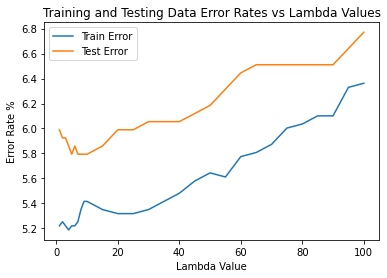

In [22]:
# initialise empty list for storage
list_of_lambdas = list(np.arange(1, 10, 1))
list_of_lambdas.extend(list(np.arange(10, 105, 5)))
max_steps = 100
stopping = 1e-12
train_error_list = []
test_error_list = []

# loop over lambda values
for set_l in list_of_lambdas:
    lgr = LogisticRegression(set_l, max_steps, stopping, log_X_train, y_train, log_X_test, y_test)
    train_error, test_error = lgr.run()
    train_error_list.append(train_error)
    test_error_list.append(test_error)
    
# plot chart
plt.plot(list_of_lambdas, train_error_list, label='Train Error')
plt.plot(list_of_lambdas, test_error_list, label='Test Error')
plt.ylabel('Error Rate %')
plt.xlabel('Lambda Value')
plt.title('Training and Testing Data Error Rates vs Lambda Values')
plt.legend()
plt.show()

In [23]:
print(train_error_list)
print(test_error_list)

[5.220228384991843, 5.252854812398042, 5.220228384991843, 5.1876019575856445, 5.220228384991843, 5.220228384991843, 5.252854812398042, 5.35073409461664, 5.415986949429037, 5.415986949429037, 5.35073409461664, 5.318107667210441, 5.318107667210441, 5.35073409461664, 5.415986949429037, 5.481239804241436, 5.579119086460032, 5.644371941272431, 5.611745513866231, 5.774877650897227, 5.807504078303426, 5.872756933115824, 6.00326264274062, 6.035889070146819, 6.101141924959217, 6.101141924959217, 6.329526916802609, 6.36215334420881]
[5.989583333333334, 5.924479166666666, 5.924479166666666, 5.859375, 5.794270833333334, 5.859375, 5.794270833333334, 5.794270833333334, 5.794270833333334, 5.794270833333334, 5.859375, 5.989583333333334, 5.989583333333334, 6.0546875, 6.0546875, 6.0546875, 6.119791666666666, 6.184895833333334, 6.315104166666667, 6.4453125, 6.510416666666667, 6.510416666666667, 6.510416666666667, 6.510416666666667, 6.510416666666667, 6.510416666666667, 6.640625, 6.770833333333333]


#### Q3 (b) 
##### What do you observe about the training and test errors as lambda changes?
Referring to the plot above, in general, the errors for both train and test increase as lambda increases. Specifically, at the beginning when lambda goes from 1 to 7, the train error rates fluctuate around 5.2% while the test error rates fall from around 6% to 5.80% (fall of 0.2%). Subsequently, when lambda increase from 7 to 10, the train error rates increase steeply by around 0.15% while the test error rates fluctuate steadily around 5.8%. As lambda increases from 10 to 20, train error rates fall by around 0.1% while test error rates rise by around 0.2%. Finally, for lambda >=20, both train and test errors rise as lambda increases.<br>
For every value of lambda, the test error rates are always higher than the train error rates. The gap between train and test error is narrower when lambda is around 10, 90, 95, and wider when lambda is around 1, 30, 65.

#### Q3 (c)
##### Training and testing error rates for lambda = 1, 10 and 100.

In [24]:
for val in [1,10,100]:
    idx = list_of_lambdas.index(val)
    print('The training error for lambda='+str(list_of_lambdas[idx])+' is: ', str(train_error_list[idx])+'%')
    print('The testing error for lambda='+str(list_of_lambdas[idx])+' is: ', str(test_error_list[idx])+'%')

The training error for lambda=1 is:  5.220228384991843%
The testing error for lambda=1 is:  5.989583333333334%
The training error for lambda=10 is:  5.415986949429037%
The testing error for lambda=10 is:  5.794270833333334%
The training error for lambda=100 is:  6.36215334420881%
The testing error for lambda=100 is:  6.770833333333333%


### Q4. K-Nearest Neighbors
For the log-transformed data, implement a KNN classifier (see week 5 lecture notes on “Nonparametric
Classification”). Use the Euclidean distance to measure distance between neighbors. For each value of K, compute the training and test error rates (i.e., percentage of emails classified wrongly).

In [25]:
class KNNClassifier():
    
    def __init__(self, lsk, x_1, y_1, x_2, y_2):
        """    
        lsk: list
            list of number of neighbours k parameter
        x_1: pandas DataFrame
            train features
        y_1: pandas DataFrame
            train target values
        x_2: pandas DataFrame
            test features
        y_2: pandas DataFrame
            test target values
        """
        self.list_of_ks = lsk
        self.log_X_train = x_1
        self.y_train = y_1
        self.log_X_test = x_2
        self.y_test = y_2
    
    # functions
    def euclidean_distance(self, vec_1, vec_2):
        """
        Calculates the euclidean distance between two vectors vec_1 and vec_2
        """
        return sum([(one-two)**2 for one, two in zip(vec_1, vec_2)])**0.5

    def calculate_error(self, pred, actual):
        """
        Calculate percentage of wrong classification
        """
        return (sum([1 if int(p)!=int(a) else 0 for p,a in zip(pred,actual)])/len(pred))*100
    
    # steps
    def calculate_distances_from_train(self, X_test, X_train, y_train):
        """
        Calculate new data distance from each row of train data
        """
        # create copies (changes not written into original dataframe)
        x_test = X_test.copy()
        x_train = X_train.copy()
        # save number of features var
        num_features = int(x_train.shape[1])
        # add index and y value into dataframe
        x_train['idx'] = x_train.index
        x_train['y_val'] = y_train[0]
        x_test['idx'] = x_test.index
        # join tables together
        x_all = x_test.assign(key=1).merge(
            x_train.assign(key=1), how='outer', on='key', suffixes =['_test', '_train']
        )
        # create column to save distance
        x_all['distance'] = 0
        # loop over every column to add subdistance into total distance
        for feature in range(0, num_features):
            x_all['distance'] += (x_all[str(feature)+'_test']-x_all[str(feature)+'_train'])**2
        # square root overall distance
        x_all['distance'] = [x**0.5 for x in x_all['distance']]
        # keep only relevant columns in final dataframe
        return x_all[['idx_train', 'idx_test', 'distance', 'y_val']]
            
        # Works but too slow
#         pred = []
#         # loop through each row of test
#         for test_row_idx in range(0, x_test.shape[0]):
#             print('Test round:', test_row_idx)
#             indexes = []
#             distances = []
#             # loop through each row of train
#             for train_row_idx in range(0, x_train.shape[0]):
#                 # calculate distance of test to every item in train
#                 dist = self.euclidean_distance(x_test.loc[test_row_idx,:], x_train.loc[train_row_idx,:])
#                 # append results
#                 indexes.append(train_row_idx)
#                 distances.append(dist)
#             # end of loop
#             pred_idx = [x for _,x in sorted(zip(distances, indexes))][0:self.k]
#             pred.append(np.mean(y_train.loc[pred_idx,:])[0])
#         pred = [1 if i>0.5 else 0 for i in pred]
#         return pred
    
    def predict(self, distances_df, set_k):
        """
        Predict on new data based on closest k information from train data
        """
        # create copies (changes not written into original dataframe)
        df = distances_df.copy()
        # sort by smallest to largest distance
        df = df.sort_values(by=['idx_test', 'distance'], ascending=['True', 'True'])
        # keep top k items per test_idx (i.e. k-items with smallest distance)
        df = df.groupby('idx_test').head(set_k).reset_index(drop=True)
        # calculate average y value
        df = df.groupby('idx_test')[['y_val']].mean().reset_index(drop=True)
        # format prediction
        pred = [1 if i>0.5 else 0 for i in df['y_val']]
        
        return pred
        
    def run(self):
        """
        Run pipeline
        """
        # create copies (changes not written into original dataframe)
        x_train = self.log_X_train.copy()
        x_test = self.log_X_test.copy()
        # get distances
        train_distances = self.calculate_distances_from_train(x_train, x_train, self.y_train)
        test_distances = self.calculate_distances_from_train(x_test, x_train, self.y_train)
        
        # initialise empty list for storage
        train_error_list = []
        test_error_list = []
        # put loop in class (unlike others above) to save re-calculation of distances
        for set_k in self.list_of_ks:
            # get predictions
            train_pred = self.predict(train_distances, set_k)
            test_pred = self.predict(test_distances, set_k)
            # score
            train_error = self.calculate_error(train_pred, self.y_train[0])
            test_error = self.calculate_error(test_pred, self.y_test[0])  
            # append results
            train_error_list.append(train_error)
            test_error_list.append(test_error)
            
        # return list of results
        return train_error_list, test_error_list

In [26]:
# trial on one round
list_of_ks = [1] 
knn = KNNClassifier(list_of_ks, log_X_train, y_train, log_X_test, y_test)
knn.run()

([0.06525285481239804], [6.901041666666667])

#### Q4 (a)
###### Plot errors across lambda = {1, 2, · · · , 9, 10, 15, 20, · · · , 95, 100}

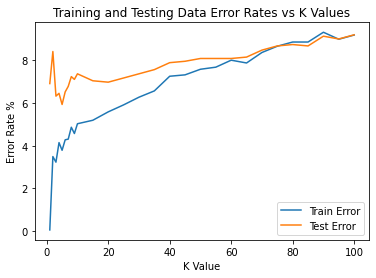

In [27]:
list_of_ks = list(np.arange(1, 10, 1))
list_of_ks.extend(list(np.arange(10, 105, 5)))

# loop over k values
knn = KNNClassifier(list_of_ks, log_X_train, y_train, log_X_test, y_test)
train_error_list, test_error_list = knn.run()

# plot chart
plt.plot(list_of_ks, train_error_list, label='Train Error')
plt.plot(list_of_ks, test_error_list, label='Test Error')
plt.ylabel('Error Rate %')
plt.xlabel('K Value')
plt.title('Training and Testing Data Error Rates vs K Values')
plt.legend()
plt.show()

In [28]:
print(train_error_list)
print(test_error_list)

[0.06525285481239804, 3.4910277324632957, 3.230016313213703, 4.143556280587276, 3.7846655791190864, 4.274061990212072, 4.306688417618271, 4.861337683523654, 4.567699836867863, 5.024469820554649, 5.1876019575856445, 5.579119086460032, 5.9053833605220225, 6.2642740619902115, 6.557911908646004, 7.243066884176183, 7.308319738988581, 7.569331158238173, 7.6672104404567705, 7.99347471451876, 7.862969004893965, 8.352365415986949, 8.64600326264274, 8.841761827079935, 8.841761827079935, 9.29853181076672, 8.97226753670473, 9.168026101141926]
[6.901041666666667, 8.3984375, 6.315104166666667, 6.4453125, 5.924479166666666, 6.510416666666667, 6.770833333333333, 7.2265625, 7.096354166666667, 7.356770833333333, 7.03125, 6.966145833333333, 7.161458333333333, 7.356770833333333, 7.552083333333333, 7.877604166666667, 7.942708333333333, 8.072916666666668, 8.072916666666668, 8.072916666666668, 8.138020833333332, 8.463541666666668, 8.658854166666668, 8.723958333333332, 8.658854166666668, 9.114583333333332, 8.

#### Q4 (b) 
##### What do you observe about the training and test errors as K changes?
Referring to the plot above, in general, the errors for both train and test increase as K increases. Specifically, at the beginning when K goes from 1 to 2, the train error rates increase very sharply from around 0% to 3.5% while the test error rates also increase fairly from about 6.9% to 8.4%. Subsequently, when K increases from 2 to 5, the train error rates increase steadily by around 0.2% while the test error rates decrease sharply by around 2.4%. As K increases from 5 to 10, train error rates continue its steady increase by around 0.7% while test error rates begin to rise by about 2.4%. As K increases from 10 to 20, train error rates continue its increase by around 0.5% while test error rates drop slightly by around 0.35%. Finally, for K >=20, both train and test error rates rise as K increases.<br>
For K<=75, the test error rates are always higher than the train error rates. The gap between train and test error is widest when K is around 1 and the gap reduces as K increases. At K=60, the train and test error rates are very similar. When K>75, the train error rates become slightly higher or slightly below but still very close to test error rates.

#### Q4 (c)
##### Training and testing error rates for K = 1, 10 and 100.

In [29]:
for val in [1,10,100]:
    idx = list_of_ks.index(val)
    print('The training error for K='+str(list_of_ks[idx])+' is: ', str(train_error_list[idx])+'%')
    print('The testing error for K='+str(list_of_ks[idx])+' is: ', str(test_error_list[idx])+'%')

The training error for K=1 is:  0.06525285481239804%
The testing error for K=1 is:  6.901041666666667%
The training error for K=10 is:  5.024469820554649%
The testing error for K=10 is:  7.356770833333333%
The training error for K=100 is:  9.168026101141926%
The testing error for K=100 is:  9.1796875%


### Q5. Survey
##### Please give an estimate of how much time you spent on this assignment.
Took around 30 hours to complete.

<< END >>